In [1]:
import praw
from psaw import PushshiftAPI
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [2]:
# Import configs
with open('config/data_params.json') as f:
    data_params = json.load(f)
api_keys = data_params['api_keys']

science_path = data_params['science_path']
myth_path = data_params['myth_path']
politics_path = data_params['politics_path']

science = data_params['science']
myth = data_params['myth']
politics = data_params['politics']

In [3]:
# Load API
with open(api_keys) as f:
    api_keys = json.load(f)
reddit = praw.Reddit(
    client_id=api_keys['client_id'],
    client_secret=api_keys['client_secret'],
    password=api_keys['password'],
    user_agent=api_keys['user_agent'],
    username=api_keys['username']
)

In [8]:
# Given a dataframe of post ID's, "rehydrate" with relevant information about the author, score, upvote ratio, and num comments
def post_info(submissions):
    submissions['author'] = submissions[0].apply(lambda x: x.author)
    submissions['score'] = submissions[0].apply(lambda x: x.score)
    submissions['upvote_ratio'] = submissions[0].apply(lambda x: x.upvote_ratio)
    submissions['num_comments'] = submissions[0].apply(lambda x: x.num_comments)
    return submissions

In [9]:
# Write all post info to disk
def write_data(infotype, infotype_path):
    # First subreddit in list - get 1000 top hot posts, rehydrate, and save to disk
    temp = pd.DataFrame(list(reddit.subreddit(infotype[0]).hot(limit=1000)))
    post_info(temp)
    print(infotype[0])

    # Save to either science.csv, myth.csv, or politics.csv
    temp.to_csv(infotype_path)
    
    # Do for rest of files (appended this time)
    for i in infotype[1:]:
        temp = pd.DataFrame(list(reddit.subreddit(i).hot(limit=1000)))
        post_info(temp)
        print(i)

        temp.to_csv(infotype_path, mode = 'a', header = False)

In [10]:
write_data(myth, myth_path)

OAuthException: invalid_grant error processing request

In [31]:
write_data(politics, politics_path)

AskThe_Donald
flatearthsociety
tucker_carlson
HillaryForPrison
climateskeptics
benshapiro
China_Flu
LockdownSkepticism
WalkAway
antifapassdenied


testing ssh key

In [11]:
from psaw import PushshiftAPI

api = PushshiftAPI()

In [12]:
import datetime as dt

start_epoch=int(dt.datetime(2020, 1, 1).timestamp())

gen = list(api.search_comments(after=start_epoch,
                            subreddit='The_Donald',
                            filter=['id'], limit = 10))
df = pd.DataFrame([thing.d_ for thing in gen])

In [13]:
list(api.search_comments(ids=df.iloc[0, 1]))

[comment(all_awardings=[], approved_at_utc=None, associated_award=None, author='[deleted]', author_flair_background_color='', author_flair_css_class=None, author_flair_template_id=None, author_flair_text=None, author_flair_text_color='dark', awarders=[], banned_at_utc=None, body='[removed]', can_mod_post=False, collapsed=True, collapsed_because_crowd_control=None, collapsed_reason=None, created_utc=1593443119, distinguished=None, edited=False, gildings={}, id='fwdfnmx', is_submitter=False, link_id='t3_f9yu7g', locked=False, no_follow=True, parent_id='t3_f9yu7g', permalink='/r/The_Donald/comments/f9yu7g/the_donald_canary_admin_takeover_imminent/fwdfnmx/', retrieved_on=1593443122, score=1, send_replies=True, stickied=False, subreddit='The_Donald', subreddit_id='t5_38unr', top_awarded_type=None, total_awards_received=0, treatment_tags=[], created=1593471919.0, d_={'all_awardings': [], 'approved_at_utc': None, 'associated_award': None, 'author': '[deleted]', 'author_flair_background_color'

In [14]:
start_epoch=int(dt.datetime(2020, 12, 31).timestamp())

gen = list(api.search_submissions(before=start_epoch,
                            subreddit='The_Donald',
                            filter=['id', 'author', 'score'],
                            limit = 10))

In [15]:
df = pd.DataFrame([thing.d_ for thing in gen])

In [16]:
df.head()

,author,created_utc,id,score,created
0,CovfefeBucks,1590708669,gshffi,1,1.590737e+09
1,CovfefeBucks,1584500691,fkille,1,1.584529e+09
2,mivvan,1584397773,fjttfh,70,1.584427e+09
3,pray_for_kekistan,1584316486,fjb8qw,1,1.584345e+09
4,CovfefeBucks,1584306846,fj8ph7,1,1.584336e+09


In [17]:
start_epoch=int(dt.datetime(2020, 12, 31).timestamp())

gen = list(api.search_comments(before=start_epoch,
                            subreddit='The_Donald',
                            filter=['id', 'author', 'score'],
                            limit = 10))

In [18]:
df = pd.DataFrame([thing.d_ for thing in gen])
df.head()

,author,created_utc,id,score,created
0,[deleted],1593443119,fwdfnmx,1,1.593472e+09
1,rufrignkidnme,1593435065,fwd2auu,1,1.593464e+09
2,penisse,1593423114,fwcoyix,1,1.593452e+09
3,FOOLISHPROPHETX,1593421798,fwcnmxe,1,1.593451e+09
4,Justcartoon13,1593411583,fwcd8tq,1,1.593440e+09


In [19]:
df['id'].to_list()

['fwdfnmx',
 'fwd2auu',
 'fwcoyix',
 'fwcnmxe',
 'fwcd8tq',
 'fwcbmsb',
 'fwc967a',
 'fwc47lt',
 'fwc2p9d',
 'fwc1zck']

In [20]:
list(api.search_comments(before=start_epoch,
                            subreddit='The_Donald',
                            ids=df['id'].to_list(),
                            filter=['id', 'author', 'score', 'created_utc'],
                            limit = 10))

[comment(author='AutoModerator', created_utc=1593402835, id='fwc1zck', score=1, created=1593431635.0, d_={'author': 'AutoModerator', 'created_utc': 1593402835, 'id': 'fwc1zck', 'score': 1, 'created': 1593431635.0}),
 comment(author='AutoModerator', created_utc=1593403341, id='fwc2p9d', score=1, created=1593432141.0, d_={'author': 'AutoModerator', 'created_utc': 1593403341, 'id': 'fwc2p9d', 'score': 1, 'created': 1593432141.0}),
 comment(author='ChooChoofuuckyouu', created_utc=1593404421, id='fwc47lt', score=1, created=1593433221.0, d_={'author': 'ChooChoofuuckyouu', 'created_utc': 1593404421, 'id': 'fwc47lt', 'score': 1, 'created': 1593433221.0}),
 comment(author='Treestyles', created_utc=1593408176, id='fwc967a', score=1, created=1593436976.0, d_={'author': 'Treestyles', 'created_utc': 1593408176, 'id': 'fwc967a', 'score': 1, 'created': 1593436976.0}),
 comment(author='BackwardPalindrome', created_utc=1593410174, id='fwcbmsb', score=1, created=1593438974.0, d_={'author': 'BackwardPali

In [21]:
import datetime as dt

start_epoch=int(dt.datetime(2021, 1, 1).timestamp())

gen = list(api.search_comments(before=start_epoch,
                            subreddit='The_Donald',
                            filter=['id'], limit = 10000))
df = pd.DataFrame([thing.d_ for thing in gen])

In [22]:
df.iloc[-1, 2]

1591449431.0

In [23]:
# Write all post info to disk
def write_dehydrated_data(infotype, infotype_path, before_year, before_day, before_month):
    
    # For each subreddit in list - get 10000 post ID's from before date and save to disk
    start_epoch=dt.datetime(before_year, before_day, before_month).timestamp()
    
    # Keep track of whether to create or append
    first = True
    
    for inf in infotype:
        for i in range(10):
            print(start_epoch)
            gen = list(api.search_comments(before=int(start_epoch),
                                        subreddit=inf,
                                        filter=['id'], limit = 10000))
            df = pd.DataFrame([thing.d_ for thing in gen])
            df['subreddit'] = inf

            print(df.shape)
            # Save to either science.csv, myth.csv, or politics.csv
            if first:
                df.to_csv(infotype_path)
                first = False
            # Append to first df
            else:
                df.to_csv(infotype_path, mode = 'a', header = False)

            # Start search from last date
            start_epoch = df['created'].iloc[-1]

In [24]:
write_dehydrated_data(['The_Donald'], politics_path, 2021, 1, 1)

1609488000.0
(1000, 4)
1591449431.0
(1000, 4)
1590802454.0


KeyboardInterrupt: 

In [14]:
df['created_utc'].iloc[-1]

1593402835

In [27]:
df = pd.read_csv(politics_path)

In [28]:
subsamp_ids = df.sample(500, replace=False)['id'].to_list()

In [29]:
len(subsamp_ids)

500

In [30]:
gen = list(api.search_comments(
                            subreddit = 'The_Donald',
                            ids = subsamp_ids,
                            filter=['id', 'author', 'score', 'created_utc']))

test = pd.DataFrame([thing.d_ for thing in gen])

In [31]:
test

,author,created_utc,id,score,created
0,[deleted],1590773654,fs7ypkf,1,1.590802e+09
1,jiujiujiu,1590773948,fs7zcd1,2,1.590803e+09
2,[deleted],1590773976,fs7zejg,1,1.590803e+09
3,The2lied,1590774039,fs7zjdz,1,1.590803e+09
4,TobiKato,1590774174,fs7ztqf,2,1.590803e+09
...,...,...,...,...,...
494,runs_in_the_jeans,1593396956,fwbsyva,1,1.593426e+09
495,bobdole776,1593397982,fwbulpi,1,1.593427e+09
496,Treestyles,1593408176,fwc967a,1,1.593437e+09
497,BackwardPalindrome,1593410174,fwcbmsb,1,1.593439e+09


In [55]:
test.loc[~(test['author'] == '[deleted]')]

,author,created_utc,id,score,created
4,MAGA_MAGGING_MAGA,1587910257,fon1v2a,1,1.587939e+09
14,MAGA_MAGGING_MAGA,1587910382,fon21fe,1,1.587939e+09
16,MAGA_MAGGING_MAGA,1587910384,fon21jy,1,1.587939e+09
27,MAGA_MAGGING_MAGA,1587910510,fon283z,1,1.587939e+09
31,MAGA_MAGGING_MAGA,1587910540,fon29o6,1,1.587939e+09
...,...,...,...,...,...
475,BananaHammock12345,1593394843,fwbpj8f,1,1.593424e+09
476,BananaHammock12345,1593394850,fwbpjp9,1,1.593424e+09
477,ProdigalPlaneswalker,1593396788,fwbsp4a,1,1.593426e+09
478,BananaHammock12345,1593398372,fwbv7rj,1,1.593427e+09


In [94]:
def partition_sample_size(size):
    new_size = size
    counter = 1
    lst = [0]
    while new_size > 500:
        new_size = new_size // 2
        counter *= 2
    if counter == 0:
        return [new_size]
    else:
        for i in range(counter):
            lst.append(new_size)
        last_num = size % new_size
        if last_num != 0:
            lst.append(last_num)
        return np.cumsum(lst)

In [107]:
def sample(size, infotype_path):
    sizes = partition_sample_size(size)
    df = pd.read_csv(infotype_path)
    samples = df.sample(size, replace=False)
    subsamp_ids = samples['id'].to_list()
    sub_df = None
    
    for i in range(len(sizes)-1):
        gen = list(api.search_comments(
                            ids = subsamp_ids[sizes[i]:sizes[i+1]],
                            filter=['id', 'author', 'score', 'created_utc']))

        if sub_df is None:
            sub_df = pd.DataFrame([thing.d_ for thing in gen])
        else:
            sub_df = sub_df.append(pd.DataFrame([thing.d_ for thing in gen]), ignore_index = True)
    return sub_df

In [108]:
sample(1000, politics_path)

ran1
ran


,author,created_utc,id,score,created
0,[deleted],1587910194,fon1rsw,1,1.587939e+09
1,MAGA_MAGGING_MAGA,1587910208,fon1shg,1,1.587939e+09
2,[deleted],1587910209,fon1sjv,1,1.587939e+09
3,[deleted],1587910210,fon1sm4,1,1.587939e+09
4,[deleted],1587910221,fon1t69,1,1.587939e+09
...,...,...,...,...,...
943,BananaHammock12345,1593394201,fwbohku,1,1.593423e+09
944,BananaHammock12345,1593394283,fwbomfo,1,1.593423e+09
945,BananaHammock12345,1593394342,fwbopuk,1,1.593423e+09
946,BananaHammock12345,1593394658,fwbp8bx,1,1.593423e+09


In [12]:
df = pd.read_csv(politics_path)

In [13]:
df.shape

(50000, 5)

# Calculating User Polarity


In [25]:
def calc_user_polarity(science_path, myth_path, politics_path, output_path, output_file): 
    #reading in the csv files
    myth_df = pd.read_csv(myth_path)
    politics_df = pd.read_csv(politics_path)
    science_df = pd.read_csv(science_path, error_bad_lines=False)
    
    #getting how many posts a user has posted in a single category 
    myth_count = myth_df.groupby('author').count().iloc[:, 0].rename('myth (%)')
    politics_count = politics_df.groupby('author').count().iloc[:, 0].rename('politics (%)')
    science_count = science_df.groupby('author').count().iloc[:, 0].rename('science (%)')

    #
    science_myth = pd.concat([science_count, myth_count], axis=1)
    all_three = pd.concat([science_myth, politics_count], axis=1)
    all_three = all_three.fillna(0)
    all_three['total'] = all_three.sum(axis=1)
    
    user_polarity = all_three.copy()
    user_polarity['science (%)'] = all_three['science (%)'] / all_three['total'] * 100
    user_polarity['politics (%)'] = all_three['politics (%)'] / all_three['total'] * 100
    user_polarity['myth (%)'] = all_three['myth (%)'] / all_three['total'] * 100
    
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    user_polarity.to_csv(output_path + '/' + output_file)

In [24]:
science = pd.read_csv(science_path, error_bad_lines=False) #559,998
myth = pd.read_csv(myth_path) #18,000
politics = pd.read_csv(politics_path) #31,000
science

b'Skipping line 150374: expected 6 fields, saw 7\n'
b'Skipping line 301838: expected 6 fields, saw 7\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,author,created_utc,id,created,subreddit
0,0,Lakota-36,1593500397,fwgaq2x,1.59353e+09,science
1,1,AlteredCabron,1593500374,fwgap5m,1.59353e+09,science
2,2,[deleted],1593500358,fwgaogn,1.59353e+09,science
3,3,msegmx,1593500322,fwgan1p,1.59353e+09,science
4,4,Kagutsuchi13,1593500321,fwgamzq,1.59353e+09,science
...,...,...,...,...,...,...
559993,995,[deleted],1589602055,fqsa7q7,1.58963e+09,science
559994,996,Green_Lantern_4vr,1589601996,fqsa4mg,1.58963e+09,science
559995,997,[deleted],1589601974,fqsa3iy,1.58963e+09,science
559996,998,[deleted],1589601946,fqsa22p,1.58963e+09,science


In [26]:
science_path = 'data/raw/science.csv'
myth_path = 'data/raw/myth.csv'
politics_path = 'data/raw/politics.csv'

calc_user_polarity(science_path, myth_path, politics_path, "data/polarity", "user_polarity.csv")

b'Skipping line 150374: expected 6 fields, saw 7\n'
b'Skipping line 301838: expected 6 fields, saw 7\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [27]:
polarity = pd.read_csv("data/polarity/user_polarity.csv")

,Unnamed: 0,science (%),myth (%),politics (%),total
0,----------_____,100.0,0.0,0.0,8.0
1,------_________,100.0,0.0,0.0,5.0
2,-----iMartijn-----,100.0,0.0,0.0,1.0
3,----_,100.0,0.0,0.0,2.0
4,----__----,100.0,0.0,0.0,2.0
...,...,...,...,...,...
163120,zt2211,0.0,0.0,100.0,1.0
163121,ztrich,0.0,0.0,100.0,1.0
163122,zxts123,0.0,0.0,100.0,1.0
163123,zygren,0.0,0.0,100.0,1.0


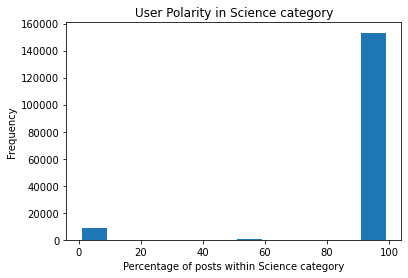

In [44]:
plt.hist(polarity['science (%)'], bins = 10, range = (0, 100), 
        histtype = 'bar', rwidth = 0.8) 
plt.xlabel('Percentage of posts within Science subreddits') 
plt.ylabel('Frequency') 
plt.title('User Polarity in Science subreddits') 
plt.show() 

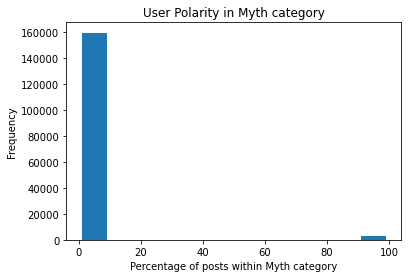

In [45]:
plt.hist(polarity['myth (%)'], bins = 10, range = (0, 100), 
        histtype = 'bar', rwidth = 0.8) 
plt.xlabel('Percentage of posts within Myth subreddits') 
plt.ylabel('Frequency') 
plt.title('User Polarity in Myth subreddits') 
plt.show() 

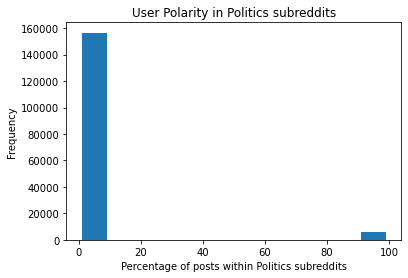

In [47]:
plt.hist(polarity['politics (%)'], bins = 10, range = (0, 100), 
        histtype = 'bar', rwidth = 0.8) 
plt.xlabel('Percentage of posts within Politics subreddits') 
plt.ylabel('Frequency') 
plt.title('User Polarity in Politics subreddits') 
plt.show() 

## Matrix code

In [14]:
myth_df = pd.read_csv(myth_path)
politics_df = pd.read_csv(politics_path)
science_df = pd.read_csv(science_path)

In [32]:
def users_by_subreddit(sci_path, poli_path, myth_path):
    paths = [sci_path, poli_path, myth_path]
    users_by_sub = dict()
    
    for data_path in paths:
        df = pd.read_csv(data_path)
        for sub in df['subreddit'].unique():
            users_by_sub[sub] = df['author'].loc[df['subreddit'] == sub]
    return users_by_sub

In [52]:
users_by_sub = users_by_subreddit(science_path, politics_path, myth_path)

In [53]:
def shared_users(users_by_sub):
    cross_counts = dict()
    for keys1, values1 in users_by_sub.items():
        for keys2, values2 in users_by_sub.items():
            cross_counts[keys1 + ', ' + keys2] = pd.Series(list(set(values1).intersection(set(values2))))
    return cross_counts

In [57]:
matrix_counts = shared_users(users_by_sub)
for keys, values in matrix_counts.items():
    matrix_counts[keys] = len(values)
matrix_counts

{'science, science': 154144,
 'science, The_Donald': 778,
 'science, bigfoot': 243,
 'The_Donald, science': 778,
 'The_Donald, The_Donald': 6645,
 'The_Donald, bigfoot': 12,
 'bigfoot, science': 243,
 'bigfoot, The_Donald': 12,
 'bigfoot, bigfoot': 3361}

In [77]:
polarities = pd.read_csv("data/polarity/user_polarity.csv")

In [71]:
polarities

,Unnamed: 0,science (%),myth (%),politics (%),total
0,----------_____,100.0,0.0,0.0,8.0
1,------_________,100.0,0.0,0.0,5.0
2,-----iMartijn-----,100.0,0.0,0.0,1.0
3,----_,100.0,0.0,0.0,1.0
4,----__----,100.0,0.0,0.0,2.0
...,...,...,...,...,...
163115,zt2211,0.0,0.0,100.0,1.0
163116,ztrich,0.0,0.0,100.0,1.0
163117,zxts123,0.0,0.0,100.0,1.0
163118,zygren,0.0,0.0,100.0,1.0


In [82]:
matrix_polarities = shared_users(users_by_sub)
for keys, values in matrix_polarities.items():
    df = pd.DataFrame(values).merge(polarities, how='left', left_on=0, right_on='Unnamed: 0')
    avg_science = df['science (%)'].mean()
    avg_myth = df['myth (%)'].mean()
    avg_politics = df['politics (%)'].mean()
    matrix_polarities[keys] = [avg_science, avg_myth, avg_politics]

matrix_polarities

{'science, science': [99.68504165328545,
  0.08764467527411311,
  0.22731367144039002],
 'science, The_Donald': [54.86319839002477,
  0.09947696922008337,
  45.037324640755145],
 'science, bigfoot': [44.253290346957286,
  55.59629969322181,
  0.1504099598208871],
 'The_Donald, science': [54.86319839002477,
  0.09947696922008337,
  45.037324640755145],
 'The_Donald, The_Donald': [6.423411338967529,
  0.0918262572933098,
  93.48476240373913],
 'The_Donald, bigfoot': [15.504774809191629,
  50.84878997617029,
  33.64643521463807],
 'bigfoot, science': [44.253290346957286,
  55.59629969322181,
  0.1504099598208871],
 'bigfoot, The_Donald': [15.504774809191629,
  50.84878997617029,
  33.64643521463807],
 'bigfoot, bigfoot': [3.1995089420739737,
  96.68036097087585,
  0.12013008705018056]}